# Exercise 1 - Introduction to PyTorch and Behavior Cloning

In this exercise, we introduce the fundamental concepts of PyTorch and show how this framework can be applied to build and train custom neural networks. 
We then utilize these networks to train an agent to play a simple video game from demonstrations.



## 0 Install packages and dependencies

We recommend using a ``conda`` environment (or virtual environments) for this and the follwing exercises. If you are not familiar with Anaconda, you can read this tutorial: [Getting started with conda]( https://conda.io/projects/conda/en/latest/user-guide/getting-started.html). 

Here's an example of the steps you can take:
1. Install a conda distribution on your machine
2. Create a new conda Python 3.9 environment with name rl_lab: ``conda create --name rl_lab python=3.9``
3. Activate the environment: ``conda activate rl_lab``
4. Install dependencies using the code cell below

In [ ]:
!pip install torch torchvision torchaudio
!pip install gymnasium==0.29.1
!pip install minatar==1.0.15
!pip install matplotlib
!pip install imageio

## 1 Introduction to PyTorch

PyTorch is a Python-based library designed for deep learning. It is distinguished by its dynamic computational graph, which enables researchers and developers to construct models with a high degree of flexibility. PyTorch has found extensive use in various scientific and engineering domains due to its ease of use and extensive research-friendly features.

This exercise is based on the [PyTorch 60-Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).

### 1.1 Tensors
Tensors are used to encode inputs and outputs of a model, as well as a model's parameters. They are comparable to NumPy's ndarrays, but they have the advantage that PyTorch tensors can run on GPUs and other accelerators. 

Extra resources: [Intuition behind tensors](https://www.youtube.com/watch?v=f5liqUk0ZTw)

In [2]:
import torch
import numpy as np

**1.1.1 Tensor Initialization**

Tensors can be initialized in multiple ways.

In [3]:
# directly from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f"Tensor from data: \n {x_data} \n")

# from a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"Tensor from NumPy array: \n {x_np} \n")

# from another tensor
print("Shape given by another tensor:")
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

# with random or constant values
shape = (2, 3,)
print("Shape defined:", shape)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Tensor from data: 
 tensor([[1, 2],
        [3, 4]]) 

Tensor from NumPy array: 
 tensor([[1, 2],
        [3, 4]]) 

Shape given by another tensor:
Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8958, 0.9213],
        [0.7105, 0.0462]]) 

Shape defined: (2, 3)
Random Tensor: 
 tensor([[0.2068, 0.6002, 0.1509],
        [0.9040, 0.2654, 0.2207]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**1.1.2 Tensor Attributes**

We can print information such as the tensor shape, the tensor datatype, and the device on which they are stored.

In [4]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


**1.1.3 Tensor Operations**

For a full list of available tensor operations check out the corresponding [PyTorch documentation](https://pytorch.org/docs/stable/torch.html).

In [5]:
# Moving tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")

In [6]:
# standard numpy-like indexing and slicing
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(f"Second column replaced with zeros \n {tensor} \n")

Second column replaced with zeros 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 



---
<span style="color:orange">**EXERCISE**</span>: **Indexing and Slicing**

In [17]:
tensor_exercise = torch.tensor([[1, 2, 3, 4],
                       [5, 6, 7, 8],
                       [9, 10, 11, 12],
                       [13, 14, 15, 16]])

# Exercise 1: Select the last 3 rows of the first 3 columns and assign them to 'submatrix'
submatrix = tensor_exercise[1:, :3]

print("Extracted submatrix:\n", submatrix)

# Exercise 2: Replace the extracted submatrix with a tensor of zeros in the original tensor
tensor_exercise[1:, :3] = torch.zeros(submatrix.shape)
print("Tensor after replacement:\n", tensor_exercise)

Extracted submatrix:
 tensor([[ 5,  6,  7],
        [ 9, 10, 11],
        [13, 14, 15]])
Tensor after replacement:
 tensor([[ 1,  2,  3,  4],
        [ 0,  0,  0,  8],
        [ 0,  0,  0, 12],
        [ 0,  0,  0, 16]])


In [25]:
# joining tensors (concatenation or stacking)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(f"Concatenated tensor \n {t1} \n")

Concatenated tensor 
 tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]]) 



In [26]:
# multiplying tensors
# element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

# matrix multiplication
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [27]:
# inplace operations have a trailing underscore
print(f"Tensor before inplace addition \n {tensor} \n")
tensor.add_(5)
print(f"Tensor after inplace addition \n {tensor} \n")

Tensor before inplace addition 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

Tensor after inplace addition 
 tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]]) 



---
<span style="color:orange">**EXERCISE**</span>: **Element-wise logarithm, multiplication and calculation of the mean**

In [30]:
tensor = torch.tensor([1.0, 2.0, 3.0, 4.0])

# Exercise 1: Calculate the element-wise natural logarithm and multiply the result with the tensor itself
log_tensor = tensor.log() * tensor
print(log_tensor)

# Exercise 2: Calculate the mean of the resulting tensor
mean_log = log_tensor.mean()
print(mean_log)

tensor([0.0000, 1.3863, 3.2958, 5.5452])
tensor(2.5568)


Note: In-place operations can be problematic when computing derivatives because of a loss of history. 

**1.1.4 Bridge with NumPy**

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and a change to one will cause the other to change.

In [31]:
t = torch.ones(5)
print(f"t: {t}")
# tensor to NumPy array
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [32]:
t.add_(1)
# both arrays are modified
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [34]:
n = np.ones(5)
# NumPy array to tensor
t = torch.from_numpy(n)
print(f"t: {t}")

t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [35]:
np.add(n, 1, out=n)
# both arrays are modified
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### 1.2 Introduction to torch.autograd

``torch.autograd`` is PyTorch's engine for automatic differentiation. It is essential for the training of neural networks.

**1.2.1 Differentiation in Autograd**

The argument ``required_grad=True`` signals to ``autograd`` that every operation on those tensors should be tracked. This allows ``autograd`` to collect gradients.

In [61]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2

If ``a`` and ``b`` are parameters of a neural networks the error function ``Q`` could looks like this:

\begin{align}Q = 3a^3 - b^2\end{align}

For the training of the neural network we need to calculate the gradients with respect to the parameters: 

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}

With ``autograd`` you can calculate those gradients by calling ``.backward()`` on Q. The ``gradient`` argument is used here to specify how much the tensors ``a`` and ``b`` should influence the gradient calculation of ``Q``. By providing ``external_grad`` as the gradient argument, you ensure that both ``a`` and ``b`` are treated as if they contribute equally to the gradient of ``Q`` (both having a weight of 1.0).

In [62]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


---
<span style="color:orange">**EXERCISE**</span>: **torch.autograd**

In [64]:
x = torch.tensor([2.0, 3.0], requires_grad=True)
y = 2 * x[0] + 3 * x[1]

# Exercise 1: Calculate gradients
y.backward()

# Exercise 2: Print gradients of 'x'
print(f"Gradients of x: {x.grad}")

Gradients of x: tensor([2., 3.])


**1.2.2 Computational Graph**

``autograd`` functions by maintaining a record of both data (tensors) and executed operations in a directed acyclic graph (DAG) composed of Function objects. Within this graph structure, the input tensors serve as the starting point (leaves), and the output tensors act as the endpoints (roots). By traversing this graph in a reverse manner, one can automatically compute gradients using the chain rule.

- **Forward pass**: ``autograd`` performs operations to compute the resulting tensor and maintains the operation's gradient function in the DAG.

- **Backward pass**: ``autograd`` (triggered by calling ``.backward()`` on the DAG root) computes the gradients from each ``.grad_fn``, accumulates them in the corresponding tensor's ``.grad`` attribute, and applies the chain rule to propagate gradients to the leaf tensors.

``autograd`` tracks operations for tensors with ``requires_grad=True``, while setting ``requires_grad=False`` excludes them; if any input tensor has ``requires_grad=True``, the output tensor will also require gradients.

Note: In PyTorch, DAGs (Directed Acyclic Graphs) are dynamic, and it's important to know that a new graph is built from scratch after each ``.backward()`` call. This flexibility enables the use of control flow statements and the ability to modify the model's shape, size, and operations in each iteration as required.


---
<span style="color:orange">**EXERCISE**</span>: **DAG**\
Think about the answers before executing the following code. Give an explanation.


In [65]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients?: {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients?: False
Does `b` require gradients?: True


**Your answers:** ...
1. both `x` and `y` have by default `requires_grad=False`. When they are used as input tensors to result the output tensor `a` then it would not require gradients.
2. since `z` has the `requires_grad=True` and it acts as an input tensor for `b` therefore `b` also require gradients.

### 1.3 Neural Networks with PyTorch

The ``torch.nn`` package can be used to construct neural networks. ``nn.Module``s contain layers, and a method ``forward(input)`` that returns the ``output``.

Typical training procedure for a neural network:
1. Define neural network with some learnable parameters (weights)
2. Iterate over dataset of inputs
3. Process input through network
4. Compute the loss (how wrong is the output)
5. Backpropagate to calculate the gradient for each of the network's weights
6. Update the weights of the network

**1.3.1 Define the network**

Define the ``forward`` function. The ``backward`` function is is automatically defined. 

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

# learnable parameters of the model
params = list(net.parameters())
n_params = np.sum([torch.numel(p) for p in params])
print(f"Number of learnable parameters: {n_params} \n")
print(params[0].shape)  # conv1's .weight

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Number of learnable parameters: 61706 

torch.Size([6, 1, 5, 5])


In [67]:
# random input
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0324, -0.0839,  0.0366, -0.0345,  0.1424, -0.0624,  0.0044,  0.0347,
          0.0458, -0.0400]], grad_fn=<AddmmBackward0>)


In [68]:
# zero gradient buffers of all parameters and backprops with random gradients
net.zero_grad()
out.backward(torch.randn(1, 10))

**1.3.2 Loss Function**

The loss function computes a value that estimates how far away the output is from the target. For the full list of available loss functions check out the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html#loss-functions).

Example: ``MSELoss`` (mean squared error)


In [69]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.7415, grad_fn=<MseLossBackward0>)


**1.3.3 Backprop**

To initiate error backpropagation, use ``loss.backward()``, but make sure to clear existing gradients; otherwise, the new gradients will accumulate onto the existing ones. This step is crucial for accurate gradient calculations.


In [70]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print("conv1.bias.grad before backward")
print(net.conv1.bias.grad)

loss.backward()

print("conv1.bias.grad after backward")
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0031, -0.0010, -0.0025,  0.0008, -0.0099, -0.0251])


**1.3.4 Update the weights**

A simple update rule is the Stochastic Gradient Descent (SGD):

*weight = weight - learning_rate * gradient*

The ``torch.optim`` package implements different update rules such as SGB, Nesterov-SGD, Adam, RMSProp, etc.

In [71]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

---
<span style="color:orange">**EXERCISE**</span>: **Neural Networks Recap**
1. What is the purpose of the forward method in a PyTorch neural network model?
2. How do you define a convolutional layer in PyTorch, and what does the nn.Conv2d module do?
3. In the provided code, how many learnable parameters does the neural network model Net have, and how can you access them?
4. Explain what happens when you call net.zero_grad() and why it is important.
5. What does the optimizer.step() method do, and when is it typically called in the training loop?

**Your answers:**
1. The Forward method is used to define the Forward Pass of a neural network in PyTorch. We basically define how the input and output of each layer in our NN processes like and which activation function is used at each layer i.e, processing the whole architecture of our NN model.
2. Convolutional layer in PyTorch is defined by defining the input in the layer, the output in the layer, and the size of the kernel (plus there are more parameters such as stride, padding, etc.). The nn.Conv2d module in PyTorch allows us to make a 2D Convolution layer.
3. In the above Neural network model we have 61706 parameters. They are accessible using `net.parameters()`
4. net.zero_grad() will reset all the model gradients to zero. It is important because everytime we do backpropogation in our NN model to update weights, the gradients of the previous iteration is kept. If we don't zero them out before next backpropogation iteration, the model will use accumalated value from previous iterations and hence result in incorrect training.
5. Optimizer.step() method is used to update the weights of the NN model. It is called after the backpropogration step i.e, after loss.backward().

---
<span style="color:orange">**EXERCISE**</span>: **Custom Layer**\
Create  a custom neural network layer called CustomLayer that inherits from nn.Module. The layer should take an input tensor and compute the element-wise square of the input tensor.
1. Define the CustomLayer class with an init and a forward method that performs the specified operation.
2. Instantiate the CustomLayer.
3. Generate a random input tensor with dimensions (1, 3, 4, 4).
4. Apply the CustomLayer to the input tensor to calculate the element-wise square.
5. Print the input tensor and the resulting output tensor.


In [72]:
import torch
import torch.nn as nn

# 1. Define the CustomLayer class that performs and outputs the elementwise square function on the inputs
class CustomLayer(nn.Module):
  def __init__(self, *args, **kwargs):
    super(CustomLayer, self).__init__()

  def forward(self, x):
    return x ** 2


# 2. Instantiate the CustomLayer
net = CustomLayer()

# 3. Generate a random input tensor
input = torch.randn(1, 3, 4, 4)

# 4. Apply the CustomLayer to the input tensor
output = net.forward(input)

# 5. Print the input tensor and the resulting output tensor
print("Input Tensor:", input)
# print(input_tensor)

print("\nOutput Tensor (Element-wise Square):", output)
# print(output_tensor)


Input Tensor: tensor([[[[ 0.4842, -0.3763,  1.7015,  0.2871],
          [ 0.3583, -0.2179,  0.0930, -0.7382],
          [ 0.1237, -0.5222, -0.5866,  0.9115],
          [ 2.5524,  1.4754,  1.2114,  0.0345]],

         [[-0.0429,  0.3397,  0.7697,  0.4871],
          [ 0.4227, -0.8150, -0.5031, -0.0501],
          [-0.5136, -0.1476, -2.0534, -1.1029],
          [ 0.3540, -0.1150, -1.1436,  0.9438]],

         [[-1.2858,  0.3421,  0.5400,  0.2203],
          [ 0.2352, -1.5010, -0.5221, -0.4569],
          [-1.3639,  0.6557,  2.2823,  2.6140],
          [ 0.8385, -0.0738,  0.8399, -1.1682]]]])

Output Tensor (Element-wise Square): tensor([[[[2.3446e-01, 1.4162e-01, 2.8952e+00, 8.2428e-02],
          [1.2837e-01, 4.7472e-02, 8.6493e-03, 5.4493e-01],
          [1.5304e-02, 2.7269e-01, 3.4416e-01, 8.3083e-01],
          [6.5149e+00, 2.1768e+00, 1.4675e+00, 1.1925e-03]],

         [[1.8431e-03, 1.1540e-01, 5.9243e-01, 2.3729e-01],
          [1.7868e-01, 6.6415e-01, 2.5309e-01, 2.5097e-03],
   

## 2 Behavior Cloning

As the name implies, Behavior Cloning is a machine learning technique where an **agent** learns to mimic the behavior of an **expert**. Hence, we (the agent) aim to clone the behavior of another agent which already peforms well on the task at hand. For a better intuition, we recommend this [Introduction into Behavior Cloning](https://www.youtube.com/watch?v=GIxDtuaC3To). Our task is the [MinAtar Breakout](https://github.com/kenjyoung/MinAtar), a game where a player controls a paddle to bounce a ball and break bricks.

Therefore, we provide expert behavior in form of observation-acion pairs retrived by a well-trained policy. Your exercise will be to implement and train a simple neural network in PyTorch, that is able to aimitate the behavior of the expert and perform well on the task.

We do the following steps:
1. Load the Minatar breakout datasets
2. Define a Convolutional Neural Network (CNN)
3. Define a loss function
4. Train the network on training data
5. Test the network on test data


<img src="breakout.gif" alt="MinAtar" width="20%"/>

_Agent using random actions to play MinAtar Breakout_  




**2.1 Loading data**

When working with image, text, audio, or video data, you can use standard Python packages to load the data into a NumPy array, which can then be transformed into a ``torch.*Tensor``. However, for large datasets, computing gradients for all data points simultaneously isn't feasible. Therefore, we adopt a technique called **batching**, where the neural network is fed chunks of our data at a time. PyTorch offers the DataLoader class for efficient management of batching and data loading. By providing the ``DataLoader`` with the data and batch size, we obtain an iterable object that can be used for training or testing. It's a good practice to shuffle the data inside the loader to reduce biases during training.

In [74]:
from torch.utils.data import DataLoader

# Load observations and actions
with open('dataset.npy', 'rb') as f:
    obss = np.load(f)
    acts = np.load(f)

# Convert to torch tensors
obss = torch.from_numpy(obss).float() # PyTorch requires float or double dtype, not bool
acts = torch.from_numpy(acts)

# Create dataset and dataloaders, which we can iterate over
dataset = []
for i in range(len(obss)):
    dataset.append((obss[i], acts[i]))

# Do a 80% / 20% split between train and test set
train_loader = DataLoader(dataset[:int(4*len(obss)/5)], batch_size=128, shuffle=True)
test_loader = DataLoader(dataset[int(4*len(obss)/5):], batch_size=128, shuffle=True)

print(f"Size of dataset: {len(dataset)}")

Size of dataset: 100000


Now, we take a look at the samples of the dataset. Each sample consists of an observation paired with the corresponding action our agent should take. The observation is an image capturing the current game frame encoded as a NumPy array. As for the actions, they are represented by integers, where 0 describes "DO NOTHING," 1 = "MOVE LEFT," and 2 = "MOVE RIGHT".

The observation is represented as Tensor with shape of torch.Size([10, 10, 4]). The first and second dimensions correspond to the height and width, while the third dimension describes the different game objects.
Additionally, the data type (dtype) of the observation is torch.float32. Each value in the array indicates whether a particular object is present (1.0 = True) or not present (0.0 = False).
The current action is 1 = MOVE LEFT


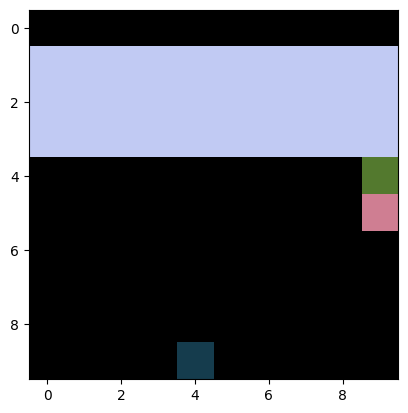

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get some arbitrary sample
obs, act = dataset[10]

# Actions and their meaning
ACTIONS = {
    0: "DO NOTHING",
    1: "MOVE LEFT",
    2: "MOVE RIGHT",
}

def to_rgb(obs):
    """ Converts the observation into an rgb image. Taken from MinAtar. """
    obs = obs.bool().numpy()
    n_channels = obs.shape[-1]
    cmap = sns.color_palette("cubehelix", n_channels)
    cmap.insert(0, (0,0,0))
    numerical_state = np.amax(obs * np.reshape(np.arange(n_channels) + 1, (1,1,-1)), 2)
    rgb_array = np.stack(cmap)[numerical_state]
    return rgb_array

print(f"The observation is represented as {obs.__class__.__name__} with shape of {obs.shape}. The first and second dimensions correspond to the height and width, while the third dimension describes the different game objects.")
print(f"Additionally, the data type (dtype) of the observation is {obs.dtype}. Each value in the array indicates whether a particular object is present (1.0 = True) or not present (0.0 = False).")
print(f"The current action is {act} = {ACTIONS[act.item()]}")

# Render observation
img = to_rgb(obs)
plt.imshow(img)
plt.show()

**2.2 Define Convolutional Neural Network**

Here we define our own classifier that takes as input a batch of observations, and ouputs three logits for each observation. These logits can be fed into a softmax function later to obtain probabilities for the actions. However, it is more convenient for the ``CrossEntropyLoss`` used in classifiers to retrieve the raw logits. We want our model to have two convolutional layers followed by two linear layers. Each but the last layer should be followed by a Rectified Linear Unit (ReLU) activation function.

Build a neural network, similar as in 1.3. Notice: it has to take as input 4-channel images. Also, we want the convolutional layers to output the same image height and width and therefore use a stride of one. However, because the kernel size is >1, padding around the images is needed. Visualize to yourself how the kernel size is leading to a change of output size and what padding is needed to keep the dimensions constant. See the PyTorch documentation for convolutional layers to get hints for the padding argument.

<img src="padding.gif" alt="MinAtar" width="50%"/>


---
<span style="color:orange">**EXERCISE**</span>: **Defining a CNN**

Fill in the gaps in the following code.

1. Define the first convolutional layer with 4 input channels (given by the data) and 16 output channels, stride 1, and kernel size 3.
    
    Tipp: Apply padding, such that the image dimensions stay the same

2. Define the second convolutional layer with 32 output channels, stride 1, and kernel size 3.

    Tipp: Apply padding, such that the image dimensions stay the same

3. Define the first linear layer mapping from the flattened output of convolutional layer 2, to 128 output nodes.

    Tipp: How can the input nodes be retrieved by the ouput channels of convolutional layer 2 and the input data shape?

4. Define the last linear layer

    Tipp: How many output nodes do we need given the action space?

5. Define the forward pass function by putting all the layers together


In [86]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, obs_shape):
        # obs_shape is the shape of a single observation -> use this information to define the dimensions of the layers
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        self.fc1 = nn.Linear(in_features=32 * obs_shape[0] * obs_shape[1], out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=3)

        self.relu = nn.ReLU()


    def forward(self, x):
        x = x.permute(0, 3, 1, 2) # CNN format (batch_size, channels, height, width)

        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))

        x = torch.flatten(x, 1)

        x = self.relu(self.fc1(x))
        out = self.fc2(x)

        return out

net = CNN(obs_shape=obss.shape[1:])

if torch.cuda.is_available():
    net.to('cuda')

**2.3 Define loss function and optimizer**

---
<span style="color:orange">**EXERCISE**</span>: **Defining a loss function**\
Implement a cross entropy loss function

Hint: check out the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

In [87]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

---
<span style="color:orange">**EXERCISE**</span>: **Defining an optimizer**\
Implement an adam optimizer and pass the learning rate as argument

Hint: check out the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

In [89]:
import torch.optim as optim

learning_rate = 0.001
optimizer = torch.optim.Adam(params=net.parameters(), lr=learning_rate)

**2.4 Train network**

---
<span style="color:orange">**EXERCISE**</span>: **Training the CNN**\
Fill in the gaps in the following code.

In [ ]:
loss_hist = []
acc_hist = []

for epoch in range(20):  # loop over the dataset multiple times
    total = 0
    correct = 0
    running_loss = 0.0

    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        if torch.cuda.is_available():
            inputs, labels = inputs.to('cuda'), labels.to('cuda')

        # perform the forward pass
        outputs = ...

        # calculate the loss ussing the criterion
        loss = ...

        # zero the parameter gradients
        ...

        # perform the backward pass to compute gradients
        ...

        # update the model's parameters using the optimizer
        ...

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'{epoch + 1} | loss: {running_loss / total:.6f} | accuracy:  {correct/total:.2f}')

    loss_hist.append(running_loss / total)
    acc_hist.append(correct/total)

print('Finished Training')


---
<span style="color:orange">**EXERCISE**</span>: **Plotting the training results**\
Plot the accuracy and loss over training steps. Make sure to give meaningful axes labels. If you are not familiar with ``matplotlib``, see this [quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start).

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8,3))

# plot accuracy over epochs
...

# plot loss over epochs
...

plt.tight_layout()
plt.show()


---
<span style="color:orange">**EXERCISE**</span>: **Interpreting training results**
1. Did the training converge? Why do you think so?
2. After how many epochs could we have stopped the training?

**2.5 Test network on test data**

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        if torch.cuda.is_available():
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
        # calculate outputs by running images through the network
        outputs = net(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test observations: {100 * correct // total} %')

This performance is significantly better than random chance, which would be a 33% accuracy when randomly selecting from 3 classes. It appears that the network has learned something meaningful.

Lastly, we want to create a short GIF showing our agent playing the breakout task. You don't need to understand the details of how this function works yet. Notice: It saves each game frame as breakout_minatar.png and removes the file in the end.

In [ ]:
import os
import imageio
import gymnasium as gym
from matplotlib import colors


def create_gif():
    """ Creates a GIF of the agent playing in the current folder. """#
    # Create environment and reset
    env = gym.make('MinAtar/Breakout-v1')
    obs, info = env.reset()
    images = []

    for i in range(1_000):
        # Get action
        obs = torch.tensor(obs, dtype=torch.float).unsqueeze(0)
        if torch.cuda.is_available():
            obs = obs.cuda()
        act_probs = net(obs)
        act = np.argmax(act_probs.detach().cpu().numpy())

        # Step the environment
        obs, reward, terminated, truncated, info = env.step(act)

        # Render as image
        n_channels = 4
        obs = obs.astype(np.float32)
        cmap = sns.color_palette("cubehelix", n_channels)
        cmap.insert(0, (0,0,0))
        cmap = colors.ListedColormap(cmap)
        numerical_state = np.amax(obs * np.reshape(np.arange(n_channels) + 1, (1,1,-1)), 2) + 0.5
        numerical_state = numerical_state.repeat(48, axis=0).repeat(48, axis=1)
        plt.imsave('breakout_minatar.png', numerical_state, cmap=cmap)
        images.append(imageio.imread('breakout_minatar.png'))

        if terminated or truncated:
            break

    # Save GIF
    imageio.mimsave('breakout.gif', images, loop=0, fps=20)
    os.remove('breakout_minatar.png')
    env.close()

create_gif()

**2.6 Additional questions**

So far, the hyperparameters for the training were given. We now want to investigate how different hyperparameters influence the training results. Additionally, there are many techniques and architectures to improve robustness and efficiency of neural network training. It is time for you to explore and find a few more.

---
<span style="color:orange">**EXERCISE**</span>: **Ablation studies: Effect of hyperparameters**
1. Learning rate: Test different learning rates of the Adam Optimizer. What happens if the learaning rate is too large/too small?
2. Epochs: Can you think of any drawbacks of training a network for too many epochs? If yes, how can we adjust the training to cope for these drawbacks?
3. Number of latent channels: Try different values for the number of latent channels. What happens if you increase/decrease the number of channels? Does an increase of channels increase the paramters of a convolutional layer or linear layer more and why?

**Your answers:...**

---
<span style="color:orange">**EXERCISE**</span>: **Robustness and efficiency**
1. We investigated the effect of layer channels. What other way can you think of to make a neural net more complex/expressive than increasing the channel sizes?
2. What is underfitting/overfitting? Explain in a few short sentences.
3. Name one technique to prevent underfitting, and one to prevent overfitting.

**Your answers:...**